
# Project for Data Processing Workshop III



## Modified from Udacity Neural Network tutorials

www.udacity.com


## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. 

There are four steps:

> Step 1: Load The Data

> Step 2: Dataset Summary & Exploration

> Step 3: Design and Test a Model Architecture

> Step 4: Test a Model on New Images

If you see "TODO: ", it means you need to finish the unfinished codes and run the block to see if its output is as expected.

If you see "COMMENTS: ", it means you need to read and understand the provided codes and write comments and explanation of the codes.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a report to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. In the report, you need to describe at least two problem encountered in setting up the development environment and implementing the codes, and the solutions to them.

In order to stand out for your project, you may also try to answer the following questions in your report:
- What is the accuracy of your model?
- How to increase the accuracy of your model?
- Can you use the model to classify other objects as well? What is the workflow?
- Can you use other models to classify the traffic signs? How to use new models?

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 1: Load The Data

- Download the data from 

> link: https://pan.baidu.com/s/1nrXQvs0EGI3bmK6jeN2nAw 

> code: 4eqc 

- put the data somewhere in your file system, e.g., the same fold with this notebook file
- the .p files are images and labels compressed together in a single file for convinient access

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/Users/chendongna/Downloads/traffic-signs-data/train.p"
validation_file= "/Users/chendongna/Downloads/traffic-signs-data/valid.p"
testing_file = "/Users/chendongna/Downloads/traffic-signs-data/test.p"

#  COMMENTS: lode data sets to memory
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
#  COMMENTS: separate data into training set and test set
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# COMMENTS: ensure data integrity
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 2: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]


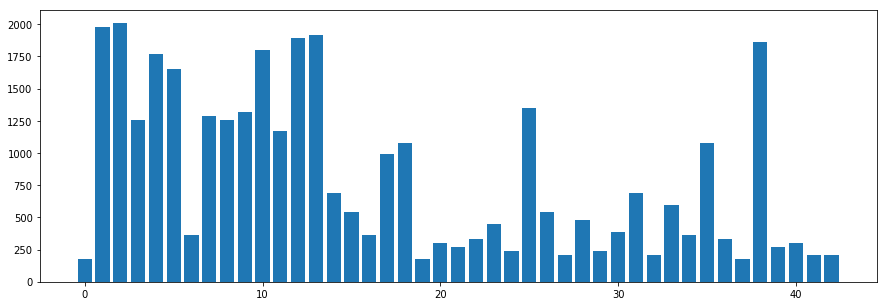

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_valid = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape[:-1]

# TODO: How many unique classes/labels there are in the dataset. Try "np.unique"
n_classes = np.unique(y_test).size

# TODO: What are the IDs of the classes, how many samples of each class are in the training set. Try "np.unique".
class_id, class_counts = np.unique(y_train, return_counts=True)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(class_id)
print(class_counts)

#TODO: Draw a bar chart that shows the number of samples of each class in training set, try plt.bar() and plt.show()
plt.figure(figsize=(15,5))
plt.bar(class_id, class_counts)
plt.show()

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

18


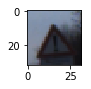

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
# Visualizations will be shown in the notebook.

# COMMENTS: reduce resolution
index = random.randint(0,len(X_train)-1)
image = X_train[index]

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
#plt.imshow(image)

# COMMENTS: show the training time of the image
print(y_train[index])

----

## Step 3: Implement and Test a Model Architecture

Implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).


Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.


### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

18


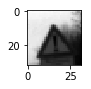

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2

# This function uses OpenCV library to convert RGB color images into gray scale images, which contain only one color channel
def grayscale(img):
    grayimg = np.zeros((32,32,1))
    grayimg[:,:,0]=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return grayimg

#X_train, y_train = shuffle(X_train, y_train)

# COMMENTS: build a empty series for the gray channel
X_train_gray = np.zeros((len(X_train),32,32,1))
X_valid_gray = np.zeros((len(X_valid),32,32,1))
X_test_gray = np.zeros((len(X_test),32,32,1))


# COMMENTS: 
for i in range(len(X_train)):
    X_train_gray[i] = grayscale(X_train[i])
    
for i in range(len(X_valid)):
    X_valid_gray[i] = grayscale(X_valid[i])
    
for i in range(len(X_test)):
    X_test_gray[i] = grayscale(X_test[i])

image = X_train_gray[index][:,:,0]
#print(X_train[index].shape())
plt.figure(figsize=(1,1))

print(y_train[index])
# COMMENTS: show tthe picture in gray channel
plt.imshow(image, cmap="gray")


### TensorFlow setup

In [5]:
#COMMENTS: import tensorflow
import tensorflow as tf

# COMMENTS: set the network layer and memory size
EPOCHS = 10
BATCH_SIZE = 128

### Model Architecture

In [6]:
# COMMENTS: What is this code block doing in general? 
# Establish model architecture: layer, input, convolution, activation, pooling, flatten.

from tensorflow.contrib.layers import flatten
global_conv2 = tf.zeros((1,5,5,16))
def LeNet(x):    
    global global_conv2
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    global_conv2 = conv2
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes （43 here, number of classes).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

## Features and Labels

In [7]:
# COMMENTS: graph of the whole system, which is similar to the image in docker.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training Pipeline
Create a training pipeline that uses the model to classify Traffic Sign data.

In [8]:
rate = 0.001

# COMMENTS: build a model
logits = LeNet(x)

# COMMENTS: calculation of softmax cross entropy between Logits and labels and dimension reduction
cross_entropy = tf.nn.softmax_cross_entropy_with_logits( logits=logits,  labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

# COMMENTS: train the training set
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
### Train the model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train = shuffle(X_train_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_gray, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.718

EPOCH 2 ...
Validation Accuracy = 0.820

EPOCH 3 ...
Validation Accuracy = 0.821

EPOCH 4 ...
Validation Accuracy = 0.835

EPOCH 5 ...
Validation Accuracy = 0.859

EPOCH 6 ...
Validation Accuracy = 0.853

EPOCH 7 ...
Validation Accuracy = 0.875

EPOCH 8 ...
Validation Accuracy = 0.886

EPOCH 9 ...
Validation Accuracy = 0.861

EPOCH 10 ...
Validation Accuracy = 0.900

Model saved


## Test on the test set

In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.876


---

## Step 4: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['4.jpg', '5.jpg', '2.jpg', '3.jpg', '1.jpg']
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


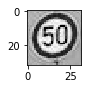

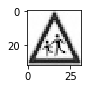

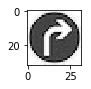

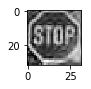

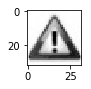

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import numpy as np
import cv2
import matplotlib.image as mpimg

#TODO: put the images you downloaded into the "online-images" folder, which is located in the same folder as this notebook
new_images = os.listdir("online-images")
print(new_images)

new_image_data = np.zeros((len(new_images),32,32,3))
new_image_gray = np.zeros((len(new_images),32,32,1))

#TODO: check signnames.csv file and specify the class of your 5 downloaded traffic signs in the vector below
y_new_image = [2, 28, 33, 14, 18]

# COMMENTS: get the shape of each image and show them into gray channel.
for i in range(len(new_images)):
    new_image_name = "online-images/" + new_images[i]
    new_image_data[i] = cv2.imread(new_image_name) 
    image = new_image_data[i]
    print(image.shape)
    #cv2.namedWindow("image")
    #cv2.imshow("image", image)

    image = new_image_data[i].astype(np.uint16)
    
    new_image_gray[i] = grayscale(image)
    image = new_image_gray[i][:,:,0]
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")
    


### Predict the Sign Type for Each Image

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
prediction_sign = tf.argmax(logits,1)
correct_prediction = tf.equal(prediction_sign, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def predict_sign(X_data, y_data):
    num_examples = len(X_data)
    sign_class = np.zeros(len(X_data))
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        sign_class = sess.run(prediction_sign, feed_dict={x: batch_x, y: batch_y})
    return sign_class 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_test_signs = predict_sign(new_image_gray, y_new_image)
    print("The signs in the pics are : ")
    print(new_test_signs)

INFO:tensorflow:Restoring parameters from ./lenet
The signs in the pics are : 
[ 1 27 33  2 18]


### Analyze Performance

In [14]:
### TODO: Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
new_image_accuracy= len(set(new_test_signs) & set(y_new_image)) / len(new_test_signs)
print(new_image_accuracy)

0.6


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    a = sess.run(logits, feed_dict={x:new_image_gray})
    topk = sess.run(tf.nn.top_k(tf.constant(a), k=5))
    print(topk)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[70.23382  , 53.883114 , 41.23099  , 30.725838 , 24.97592  ],
       [47.13442  , 38.48222  , 36.333286 , 32.798923 , 30.558445 ],
       [27.571333 , 25.873827 , 14.125966 , 13.39075  , 11.179029 ],
       [18.942835 , 16.539593 , 11.783382 ,  6.019302 ,  5.7253957],
       [88.17277  , 58.546227 , 38.11372  , 26.691145 , 19.051474 ]],
      dtype=float32), indices=array([[ 1,  2, 40,  4,  7],
       [27, 32, 20, 11, 28],
       [33,  7,  3, 35,  5],
       [ 2,  1, 13, 39, 25],
       [18, 27, 26, 40, 11]], dtype=int32))


# Extension

### Task 1

From the confusion matrix,  `Speed limit (50km/h)` has the highest accuracy and `Road narrows on the right` has the lowest one in the classification.

### Task 2

In [16]:
import itertools

def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(15,15))
    plt.imshow(confusion_matrix, interpolation="nearest", cmap=plt.cm.Blues)

    thresh = confusion_matrix.max() / 2.
    rows, cols = confusion_matrix.shape
    for i, j in itertools.product(range(rows), range(cols)):
        count = confusion_matrix[i,j]
        if count > 0:
            plt.text(j, i, count, size="smaller",
                     horizontalalignment="center", verticalalignment="center",
                     color="white" if count > thresh else "black")

    plt.title("Confusion Matrix")
    tick_marks = np.arange(confusion_matrix.shape[0])
    tick_labels = [class_labels[str(tm)] for tm in tick_marks]
    plt.xticks(tick_marks, tick_labels, rotation=90)
    plt.yticks(tick_marks, tick_labels)
    plt.tight_layout()
    plt.ylabel('True label', size="x-large")
    plt.xlabel('Predicted label', size="x-large")

In [34]:
from sklearn.metrics import confusion_matrix
import csv

In [35]:
class_labels = {}
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    class_labels = {key: val for key, val in reader}

INFO:tensorflow:Restoring parameters from ./lenet


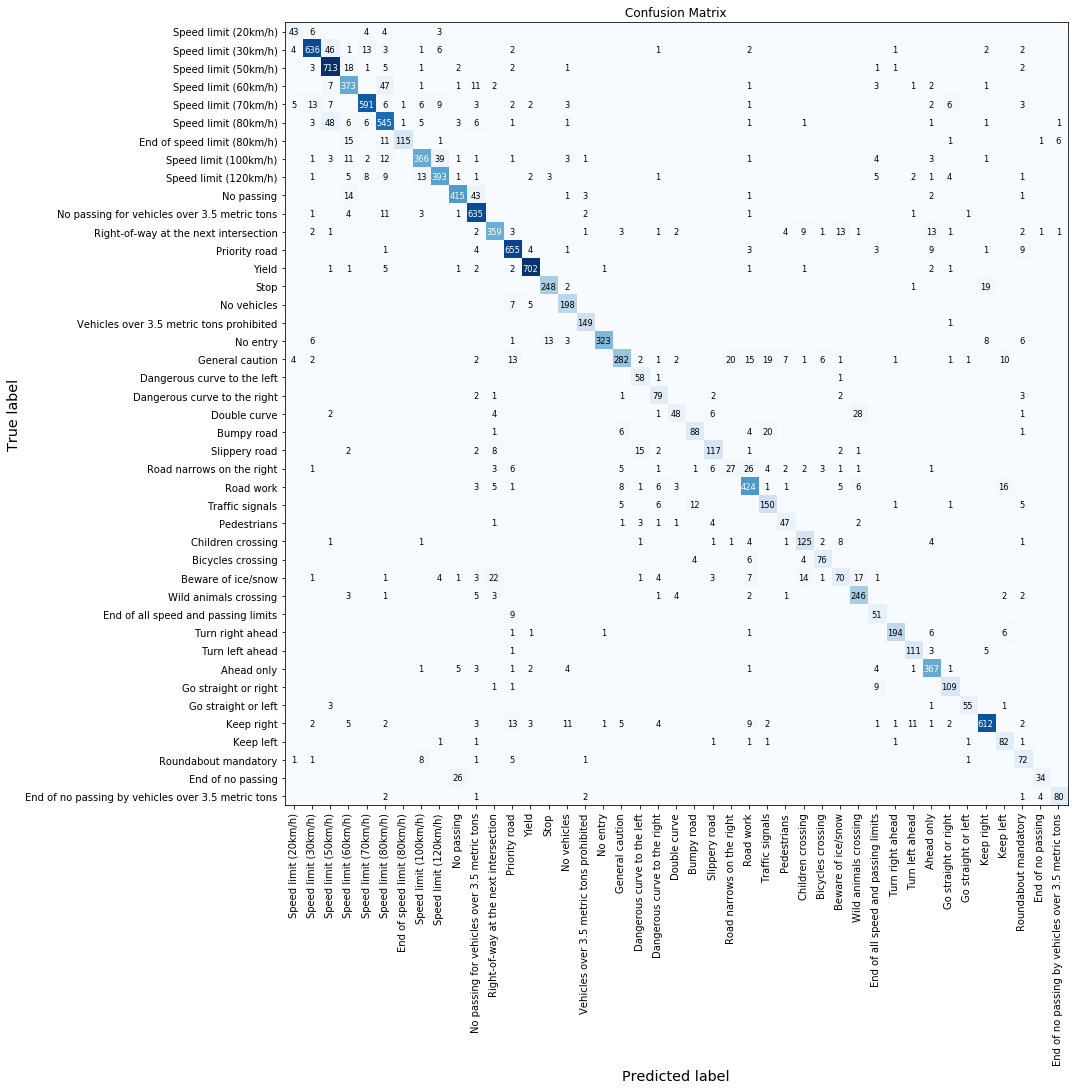

In [36]:
y_predictions = tf.argmax(logits, 1)
y_truth = tf.convert_to_tensor(y_test)
confusion_operation = tf.contrib.metrics.confusion_matrix(y_truth, y_predictions)

X = tf.placeholder(tf.float32, (None, 32, 32, 1), name="X_vals")
y = tf.placeholder(tf.int32, (None), name="y_vals")
keep_prob = tf.placeholder(tf.float32, name="keep_prob")
one_hot_y = tf.one_hot(y, n_classes)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    confusion = sess.run(confusion_operation, feed_dict={x: X_test_gray, keep_prob: 1.})
    plot_confusion_matrix(confusion)

### Task 3

For the class with lower classification accuracy, they are most likely to be misclassified into the class with similar shapes and color. `End of no passing` has a low accuracy and half of its pictures were predicted as `No passing`. `Speed limit` of `60km/h` and `80km/h` are quite similar, and some of them are classified into each other's categories, although their accuracy is very high. This is probably due to the problem of image clarity, which makes the number `8` and `6` have classified mistakes.